In [1]:
import sys
sys.path.append(r'..\src')

import pandas as pd

import mysql.connector as conn

from src import getGraphic
from ufc_fights import set_names_upper, set_name_winner, fix_columns, set_nan_columns, add_fighterid
from ufc_fighters import load_ufc, set_fighter_upper, clean_fighters

In [2]:
fighter = pd.read_csv(r'..\data\raw_fighter_details.csv')

data = pd.read_csv(r'..\data\data.csv')

ufc_fighters = pd.read_csv(r'..\data\ufc_fighters_official.csv')

# TABLA LUCHADORES

In [3]:
#load_ufc()

In [4]:
fighter.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [5]:
ufc_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2535 non-null   int64 
 1   Nombres     2535 non-null   object
 2   Categoría   2535 non-null   object
 3   Record      2535 non-null   object
dtypes: int64(1), object(3)
memory usage: 79.3+ KB


In [6]:
set_fighter_upper(fighter)

fighter.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,TOM AARON,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,PAPY ABEDI,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,SHAMIL ABDURAKHIMOV,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,DANNY ABBADI,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,HIROYUKI ABE,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [7]:
fighters = clean_fighters(fighter, ufc_fighters)

fighters.tail()

,fighter_id,Name,DOB,Record,Categoría,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
2204,2204,ZHALGAS ZHUMAGULOV,1988-08-29 00:00:00,14-6-0 (W-L-D),Flyweight,162.56,56.25,167.64,Switch,4.17,0.49,4.00,0.58,1.50,0.21,0.33,0.0
2205,2205,ZHANG LIPENG,1990-03-10 00:00:00,9-9-1 (W-L-D),Lightweight,180.34,69.75,180.34,Southpaw,1.28,0.48,1.88,0.53,1.75,0.30,0.69,0.8
2206,2206,ZHANG WEILI,1989-08-13 00:00:00,21-3-0 (W-L-D),Women's Strawweight,162.56,51.75,160.02,Switch,6.38,0.45,4.43,0.53,1.26,0.23,1.00,0.5
2207,2207,ZUBAIRA TUKHUGOV,1991-01-15 00:00:00,20-5-1 (W-L-D),Featherweight,172.72,65.25,172.72,Orthodox,2.54,0.38,2.53,0.63,2.54,0.46,1.00,0.0
2208,2208,UNKNOWN,0,UNKNOWN,UNKNOWN,0.00,0.00,0.00,UNKNOWN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


# TABLA FIGHTS

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [9]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


<AxesSubplot:>

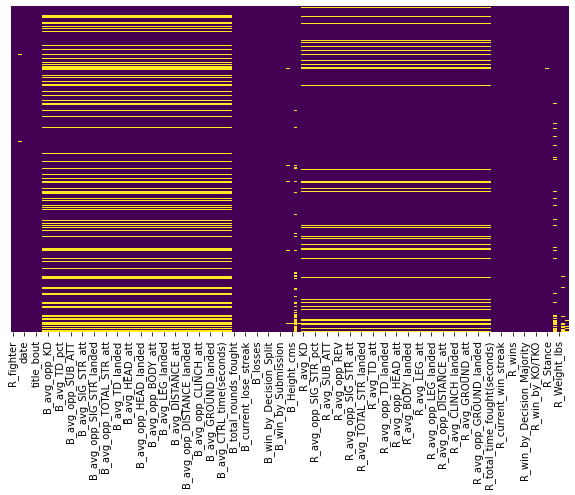

In [10]:
getGraphic(data)

In [11]:
set_names_upper(data)

data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,ADRIAN YANEZ,GUSTAVO LOPEZ,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,TREVIN GILES,ROMAN DOLIDZE,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,TAI TUIVASA,HARRY HUNSUCKER,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,CHEYANNE BUYS,MONTSERRAT CONEJO,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,MARION RENEAU,MACY CHIASSON,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [12]:
set_name_winner(data)

data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,ADRIAN YANEZ,GUSTAVO LOPEZ,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",ADRIAN YANEZ,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,TREVIN GILES,ROMAN DOLIDZE,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",TREVIN GILES,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,TAI TUIVASA,HARRY HUNSUCKER,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",TAI TUIVASA,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,CHEYANNE BUYS,MONTSERRAT CONEJO,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",MONTSERRAT CONEJO,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,MARION RENEAU,MACY CHIASSON,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",MACY CHIASSON,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [13]:
fix_columns(data)

data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,...,B_PCT_BODY,R_PCT_BODY,B_PCT_LEG,R_PCT_LEG,B_PCT_DISTANCE,R_PCT_DISTANCE,B_PCT_CLINCH,R_PCT_CLINCH,B_PCT_GROUND,R_PCT_GROUND
0,ADRIAN YANEZ,GUSTAVO LOPEZ,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",ADRIAN YANEZ,False,Bantamweight,0.000,0.420000,...,52.0,50.0,60.0,NaN,74.0,67.0,70.0,50.0,60.0,NaN
1,TREVIN GILES,ROMAN DOLIDZE,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",TREVIN GILES,False,Middleweight,0.500,0.660000,...,60.0,59.0,52.0,50.0,66.0,66.0,50.0,66.0,61.0,58.0
2,TAI TUIVASA,HARRY HUNSUCKER,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",TAI TUIVASA,False,Heavyweight,NaN,NaN,...,NaN,56.0,NaN,55.0,NaN,69.0,NaN,57.0,NaN,57.0
3,CHEYANNE BUYS,MONTSERRAT CONEJO,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",MONTSERRAT CONEJO,False,WomenStrawweight,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MARION RENEAU,MACY CHIASSON,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",MACY CHIASSON,False,WomenBantamweight,0.125,0.535625,...,54.0,56.0,62.0,54.0,75.0,75.0,58.0,58.0,67.0,64.0


In [14]:
set_nan_columns(data)

data.head()

,event_id,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,...,B_PCT_BODY,R_PCT_BODY,B_PCT_LEG,R_PCT_LEG,B_PCT_DISTANCE,R_PCT_DISTANCE,B_PCT_CLINCH,R_PCT_CLINCH,B_PCT_GROUND,R_PCT_GROUND
0,0,ADRIAN YANEZ,GUSTAVO LOPEZ,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",ADRIAN YANEZ,False,Bantamweight,0.000,...,52.0,50.0,60.0,0.0,74.0,67.0,70.0,50.0,60.0,0.0
1,1,TREVIN GILES,ROMAN DOLIDZE,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",TREVIN GILES,False,Middleweight,0.500,...,60.0,59.0,52.0,50.0,66.0,66.0,50.0,66.0,61.0,58.0
2,2,TAI TUIVASA,HARRY HUNSUCKER,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",TAI TUIVASA,False,Heavyweight,0.000,...,0.0,56.0,0.0,55.0,0.0,69.0,0.0,57.0,0.0,57.0
3,3,CHEYANNE BUYS,MONTSERRAT CONEJO,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",MONTSERRAT CONEJO,False,WomenStrawweight,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,MARION RENEAU,MACY CHIASSON,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",MACY CHIASSON,False,WomenBantamweight,0.125,...,54.0,56.0,62.0,54.0,75.0,75.0,58.0,58.0,67.0,64.0


In [15]:
data = add_fighterid(data,fighters)

data.head()

,event_id,R_fighter,RFighter_id,B_fighter,BFighter_id,Referee,date,location,Winner,title_bout,...,B_PCT_BODY,R_PCT_BODY,B_PCT_LEG,R_PCT_LEG,B_PCT_DISTANCE,R_PCT_DISTANCE,B_PCT_CLINCH,R_PCT_CLINCH,B_PCT_GROUND,R_PCT_GROUND
0,0,ADRIAN YANEZ,24,GUSTAVO LOPEZ,784,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",ADRIAN YANEZ,False,...,52.0,50.0,60.0,0.0,74.0,67.0,70.0,50.0,60.0,0.0
1,1,TREVIN GILES,2083,ROMAN DOLIDZE,1801,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",TREVIN GILES,False,...,60.0,59.0,52.0,50.0,66.0,66.0,50.0,66.0,61.0,58.0
2,2,TAI TUIVASA,1986,HARRY HUNSUCKER,792,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",TAI TUIVASA,False,...,0.0,56.0,0.0,55.0,0.0,69.0,0.0,57.0,0.0,57.0
3,3,CHEYANNE BUYS,2208,MONTSERRAT CONEJO,2208,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",MONTSERRAT CONEJO,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,MARION RENEAU,1405,MACY CHIASSON,1357,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",MACY CHIASSON,False,...,54.0,56.0,62.0,54.0,75.0,75.0,58.0,58.0,67.0,64.0


In [16]:
fffff

NameError: name 'fffff' is not defined

# LOAD SQL

In [ ]:
crea_db=conn.connect(host='localhost', user='root', passwd='10081973')

cursor=crea_db.cursor()

cursor.execute('drop database if exists ufc_database;')
cursor.execute('create database ufc_database;')
cursor.execute('use ufc_database;')

In [ ]:
cursor.execute('drop table if exists fighters;')

tabla='''

        create table fighters (
            
            fighter_id int primary key,Name varchar(100), DOB varchar(100), Record varchar(100), Categoría varchar(100),
            Height_cm float, Weight_kg float, Reach_cm float, Stance varchar(100), SLpM float, Str_Acc varchar(100),
            SApM float, Str_Def varchar(100), TD_Avg float, TD_Acc varchar(100), TD_Def varchar(100), Sub_Avg float
        );
'''

cursor.execute(tabla)

In [ ]:
for i in range(len(fighters)):
    
    insert_query='insert into {} ({}) values {};'\
                 .format('fighters', ','.join(fighters.columns), tuple(fighters.iloc[i].values))
    
    insert_query=f"insert into fighters ({','.join(fighters.columns)}) values {tuple(fighters.iloc[i].values)};"
    
    cursor.execute(insert_query)
    
crea_db.commit()

In [ ]:
cursor.execute('drop table if exists fights;')

tabla='''

        create table fights (
            
            event_id int primary key, R_fighter varchar(100), RFighter_id int,
            foreign key (RFighter_id) references fighters(fighter_id),
            B_fighter varchar(100), BFighter_id int,foreign key (BFighter_id) references fighters(fighter_id),
            Referee varchar(100), date varchar(100), location varchar(100), state varchar(100), country varchar(100)
            ,Winner varchar(100),
            title_bout bool, weight_class varchar(100), B_avg_KD float, B_avg_SIG_STR_pct float,
            B_avg_TD_pct float, B_avg_SUB_ATT float, B_avg_REV float, B_avg_CTRL_time float,
            R_avg_KD float, R_avg_SIG_STR_pct float, R_avg_TD_pct float, R_avg_SUB_ATT float, R_avg_REV float,
            R_avg_CTRL_time float, B_PCT_STRIKES float, R_PCT_STRIKES float,B_PCT_HEAD float,
            R_PCT_HEAD float, B_PCT_BODY float, R_PCT_BODY float, B_PCT_LEG float,R_PCT_LEG float,
            B_PCT_DISTANCE float, R_PCT_DISTANCE float, B_PCT_CLINCH float, R_PCT_CLINCH float,
            B_PCT_GROUND float, R_PCT_GROUND float
        );
'''

cursor.execute(tabla)

In [ ]:
for i in range(len(data)):
    
    insert_query='insert into {} ({}) values {};'\
                 .format('fights', ','.join(data.columns), tuple(data.iloc[i].values))
    
    insert_query=f"insert into fights ({','.join(data.columns)}) values {tuple(data.iloc[i].values)};"
    
    cursor.execute(insert_query)
    
crea_db.commit()